In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(close=None, block=None)>

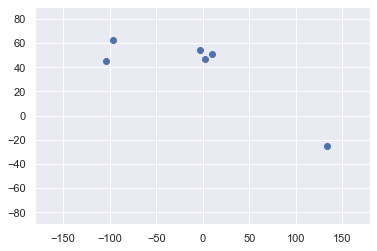

In [4]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [5]:
x = data.iloc[:,1:3]

In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [7]:
kmeans = KMeans(3)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

In [10]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


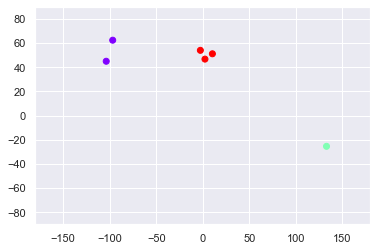

In [11]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [12]:
#------------------- NEW -----------------------------------------------

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [14]:
data = pd.read_csv ('3.12. Example.csv')

In [15]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

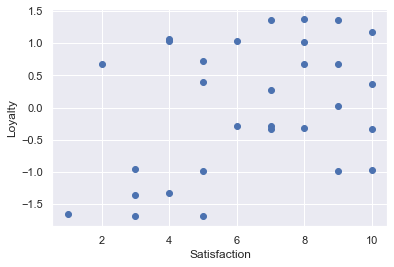

In [16]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [17]:
x = data.copy()

In [18]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [19]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

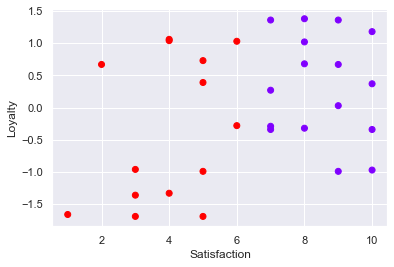

In [20]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [21]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [22]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[59.999999999999986,
 29.818973034723143,
 18.058485014940025,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.366082587179451,
 4.337110750237059,
 3.98252830763191]

Text(0, 0.5, 'WCSS')

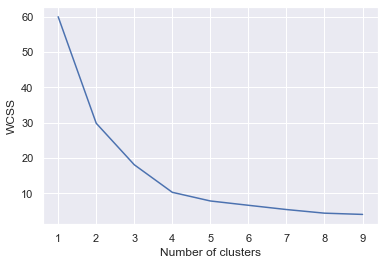

In [23]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [27]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [28]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,3
2,5,-0.99,0
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

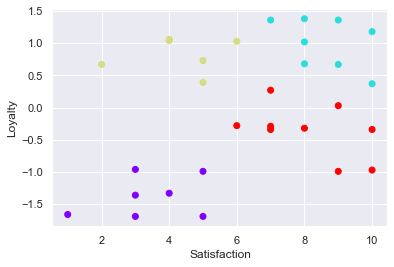

In [29]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')